In [8]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='fivethirtyeight')
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

In [9]:
data = pd.read_csv('walmart.csv')

#data = pd.read_csv('/kaggle/input/walmart-sales/Walmart_sales.csv')


In [10]:
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,691",0,42,3,211,8
1,1,12-02-2010,"1,641,957",1,39,3,211,8
2,1,19-02-2010,"1,611,968",0,40,3,211,8
3,1,26-02-2010,"1,409,728",0,47,3,211,8
4,1,05-03-2010,"1,554,807",0,46,3,211,8


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
pd.options.display.float_format = '{:,.0f}'.format

In [13]:
data.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [14]:
data.columns = data.columns.str.lower()

In [15]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [16]:
data.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
# changing the date format
data['date'] = pd.to_datetime(data['date'], format = "%d-%m-%Y")

In [147]:
def Sessons(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

In [165]:
#creating Year, Quarter col q1,q2,q3,q4
data['year'] = data['date'].dt.year # 
data['quarter'] = data['date'].dt.quarter
#call function to get the names
data['season'] = data['quarter'].apply(Sessons)
#adding the month col
data['month'] = data['date'].dt.month 

#now adding the weeks col this will show week names(sat, sun,monday etc)
#adding the week days numeric col
data['week'] = data['date'].dt.isocalendar().week
data['week_days'] = data['date'].dt.day_name()
#added months name col this will display month names
data['month_name'] = data['date'].dt.month_name()

In [166]:
#data.drop(['months_name'],axis=1, inplace =True) mistakenly added cols and then dropped 


In [167]:
#data.drop(['day_of_week'],axis=1, inplace= True)

In [168]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,week,week_days,month_name
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,5,Friday,February
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,6,Friday,February
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,7,Friday,February
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,8,Friday,February
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,9,Friday,March


# conducting Explortory Data Analysis by three ways

# Univariant

In [94]:
#getting all the numerical features and checking the statistical values
data[['fuel_price','weekly_sales','temperature','unemployment','cpi']].describe()

,fuel_price,weekly_sales,temperature,unemployment,cpi
count,"6,435","6,435","6,435","6,435","6,435"
mean,3,"1,046,965",61,8,172
std,0,"564,367",18,2,39
min,2,"209,986",-2,4,126
25%,3,"553,350",47,7,132
50%,3,"960,746",63,8,183
75%,4,"1,420,159",75,9,213
max,4,"3,818,686",100,14,227


histogram of numerical values by using square root rule, n = number of datapoints   

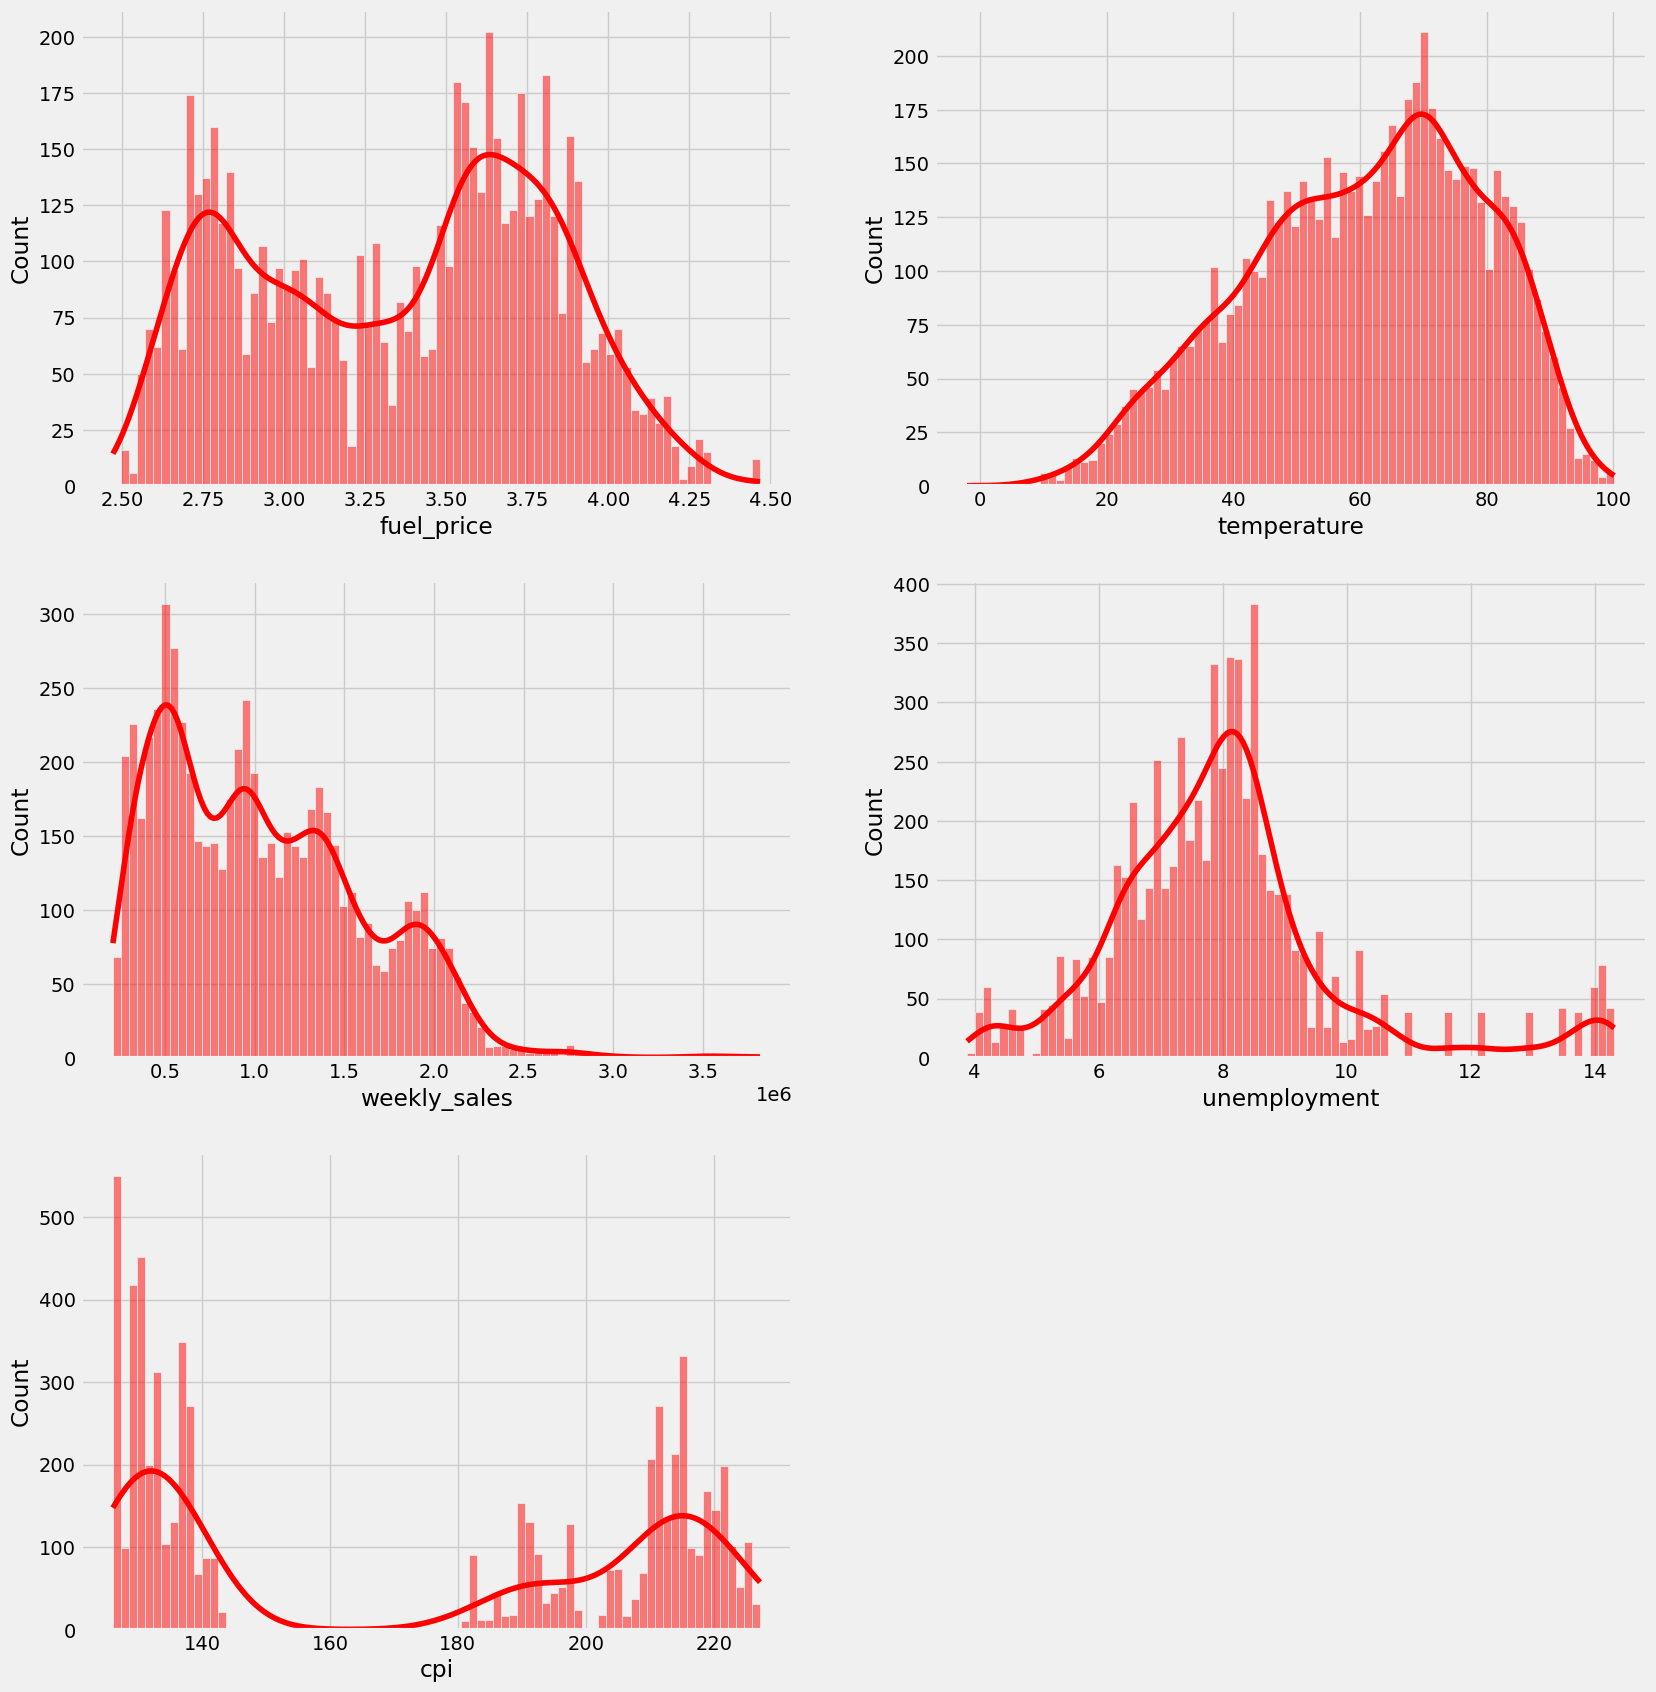

In [95]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

columns = ['fuel_price','temperature','weekly_sales', 'unemployment','cpi']

plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    #for bins count, applying Square root rule
    sns.histplot(data = data, x = col, kde = True, bins = round(np.sqrt(len(data))), color = 'red') 
plt.show()

In [169]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,week,week_days,month_name
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,5,Friday,February
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,6,Friday,February
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,7,Friday,February
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,8,Friday,February
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,9,Friday,March


catagory wise analyzation of variables 
Seasons: calculating which season is making more sales, season wise

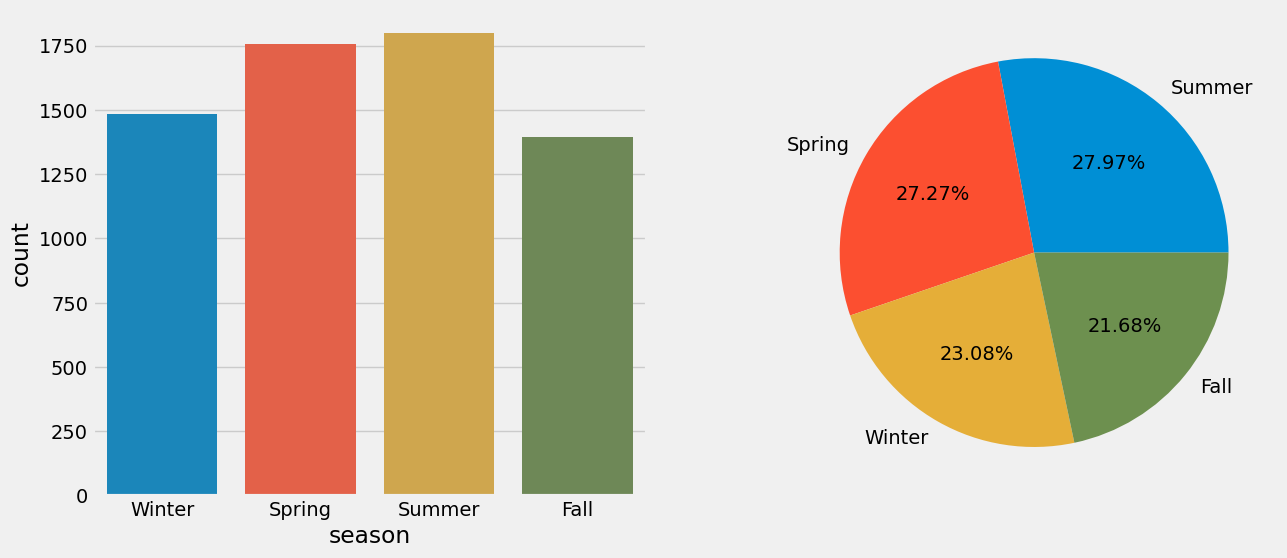

In [97]:
seasons = data['season'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = data, x = 'season', ax=ax[0])

ax[1].pie(data['season'].value_counts().values,
         labels = data['season'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

    According to the bar & pie plot Summers are best for sales 

In [98]:
#holiday vs weekdays
#getting the holidays count
count_holiday = data['holiday_flag'].value_counts()
count_holiday

holiday_flag
0    5985
1     450
Name: count, dtype: int64

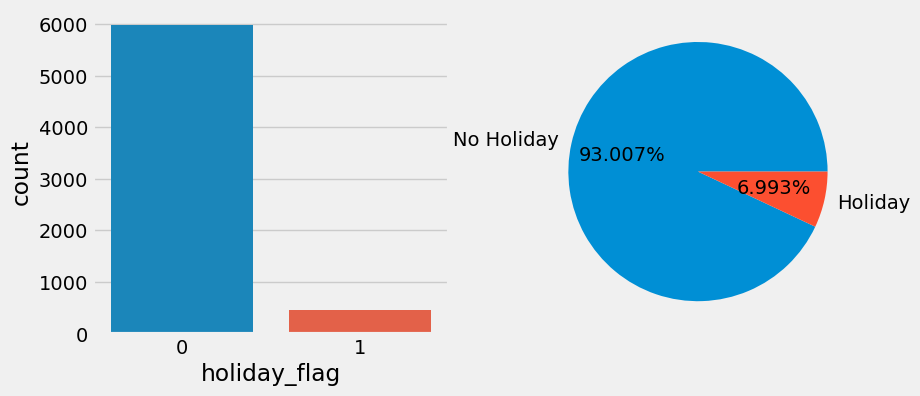

In [99]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))
sns.countplot(data = data, x = 'holiday_flag', ax=ax[0])

ax[1].pie(data['holiday_flag'].value_counts().values,
labels = ['No Holiday', 'Holiday'], autopct = '%1.3f%%')
plt.show()

In [100]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,5
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,6
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,7
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,9


Year: calculating which year is making more sales, season wise

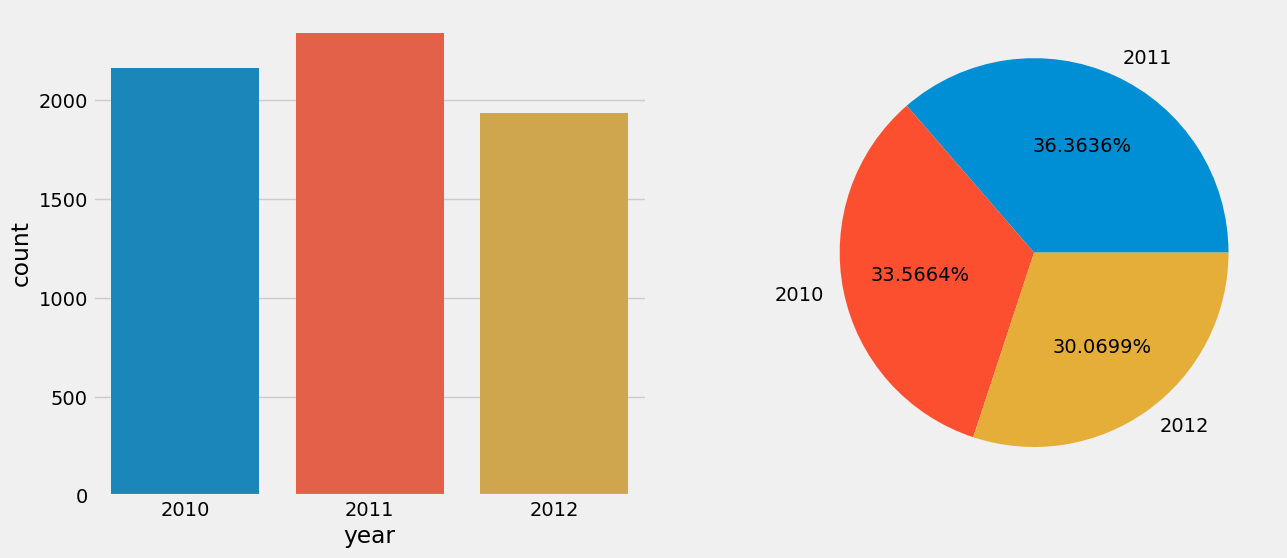

In [101]:
years = data['year'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = data, x = 'year', ax=ax[0])

ax[1].pie(data['year'].value_counts().values,
         labels = data['year'].value_counts().index, 
         autopct = '%1.4f%%')
plt.show()

    Year 2011 is making good sales 

Months wise

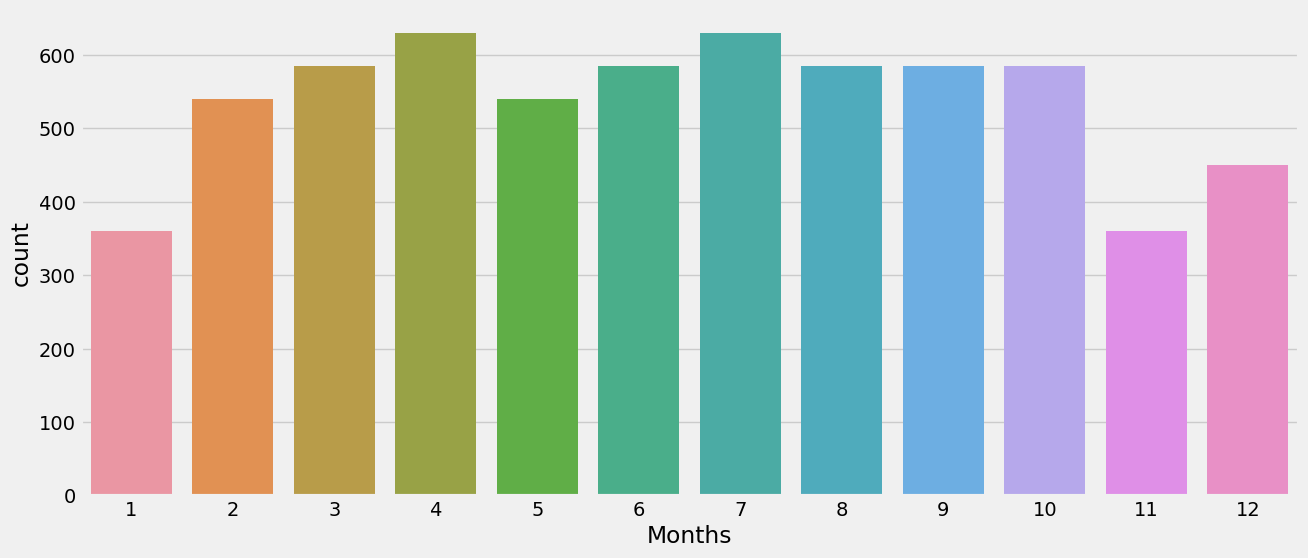

In [102]:
months = data['month'].value_counts()
plt.figure(figsize = (14, 6))
sns.countplot(data = data, x = 'month')
plt.xlabel('Months')
plt.show()

    the Month of July is perfroming better than the rest of the months 

In [171]:
data['week_days'].value_counts()

week_days
Friday    6435
Name: count, dtype: int64

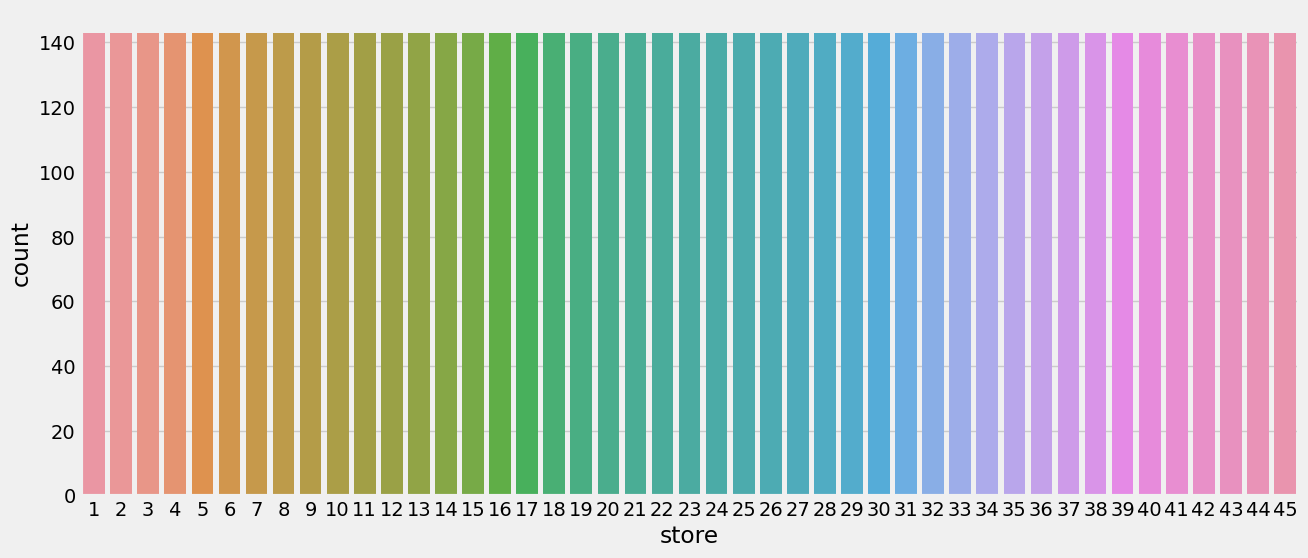

In [172]:
plt.figure(figsize = (14, 6))
sns.countplot(data = data, x = 'stores')
plt.show()

# Bi-variant analysis

In [103]:
#taking mean of both the variables and printing the graph accordingly
data.groupby('holiday_flag')['weekly_sales'].mean()

holiday_flag
0   1,041,256
1   1,122,888
Name: weekly_sales, dtype: float64

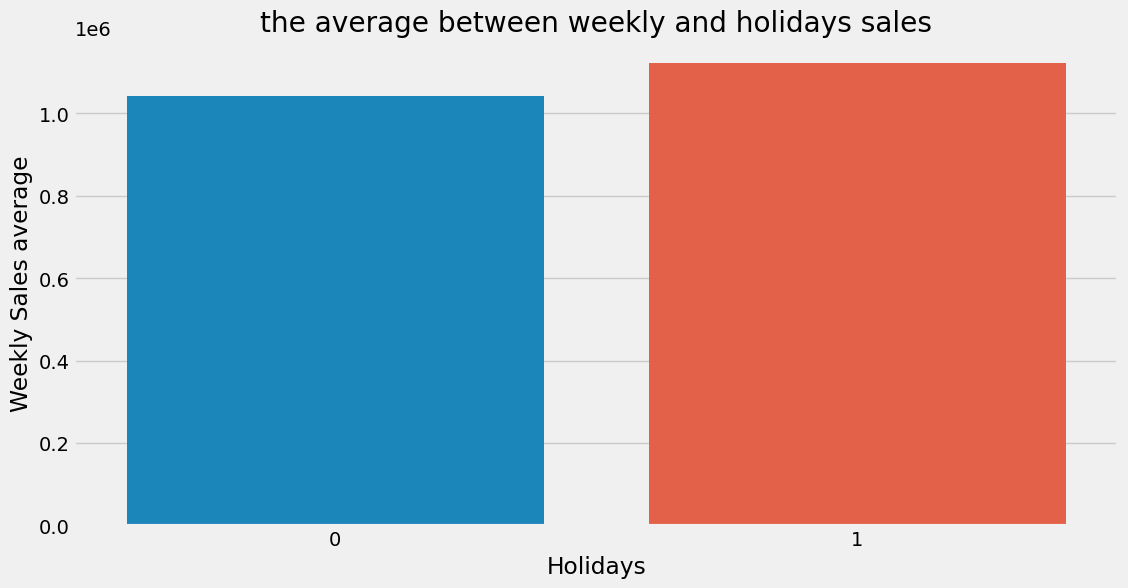

In [104]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.mean,
           ci = False)

plt.title('the average between weekly and holidays sales')
plt.xlabel('Holidays')
plt.ylabel('Weekly Sales average')
plt.show()

In [105]:
#Total sales made between holidays and week days
data.groupby('holiday_flag')['weekly_sales'].sum()

holiday_flag
0   6,231,919,436
1     505,299,552
Name: weekly_sales, dtype: float64

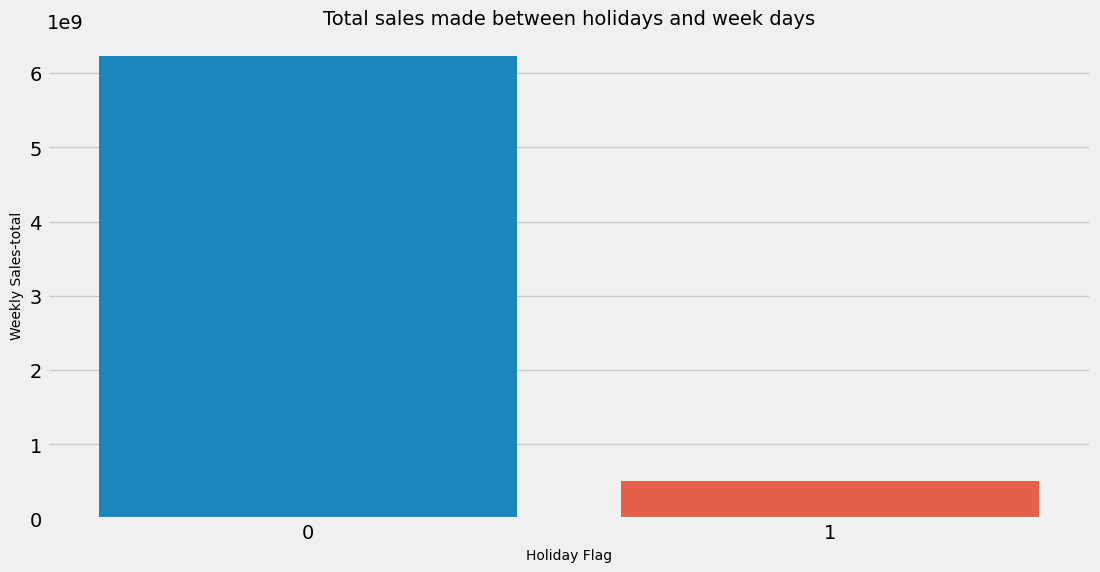

In [106]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.sum,
           ci = False)

plt.title('Total sales made between holidays and week days', size = 14)
plt.xlabel('Holiday Flag', size = 10)
plt.ylabel('Weekly Sales-total', size = 10)
plt.show()


Branch/store wise analysis, which branch is performing better

In [107]:
branch_performance =  data.groupby('store')['weekly_sales'].sum().sort_values(ascending = False)
branch_performance 

store
20   301,397,792
4    299,543,953
14   288,999,911
13   286,517,704
2    275,382,441
10   271,617,714
27   253,855,917
6    223,756,131
1    222,402,809
39   207,445,542
19   206,634,862
31   199,613,906
23   198,750,618
24   194,016,021
11   193,962,787
28   189,263,681
41   181,341,935
32   166,819,246
18   155,114,734
22   147,075,649
12   144,287,230
26   143,416,394
34   138,249,763
40   137,870,310
35   131,520,672
8    129,951,181
17   127,782,139
45   112,395,341
21   108,117,879
25   101,061,179
43    90,565,435
15    89,133,684
7     81,598,275
42    79,565,752
9     77,789,219
29    77,141,554
16    74,252,425
37    74,202,740
30    62,716,885
3     57,586,735
38    55,159,626
36    53,412,215
5     45,475,689
44    43,293,088
33    37,160,222
Name: weekly_sales, dtype: float64

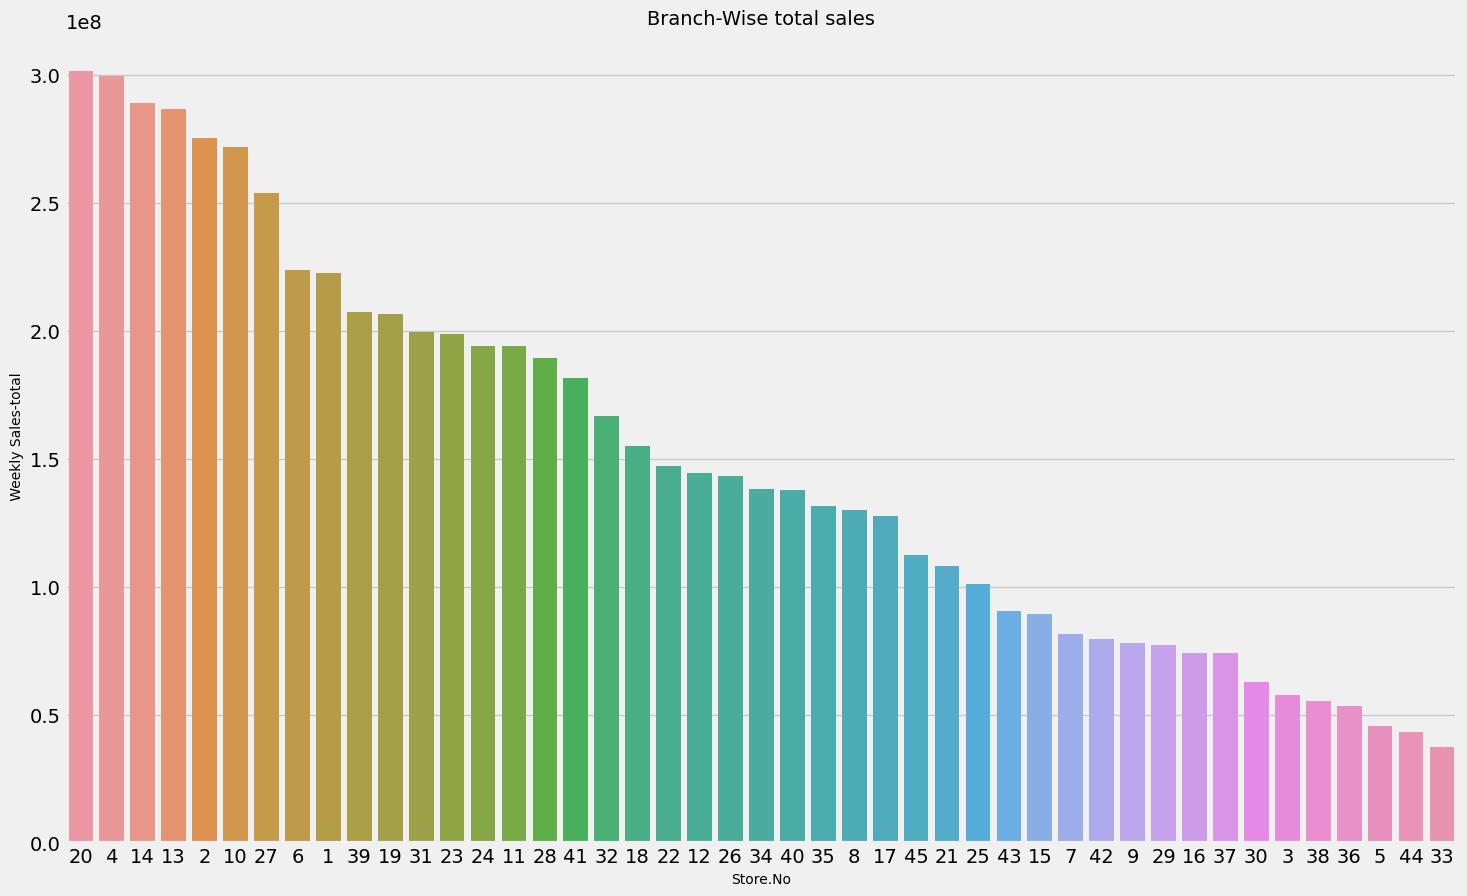

In [108]:
plt.figure(figsize = (16, 10))
sns.barplot(data = data,
           x = 'store',
           y = 'weekly_sales',
           order = branch_performance.index,
           estimator = np.sum,
           ci = False)

plt.title('Branch-Wise total sales', size = 14)
plt.xlabel('Store.No', size = 10)
plt.ylabel(' Weekly Sales-total', size = 10)
plt.show()


Branch No.20 takes a clear lead in performing better than others and 33 is the lowest

Temperature vs Weekly sales 

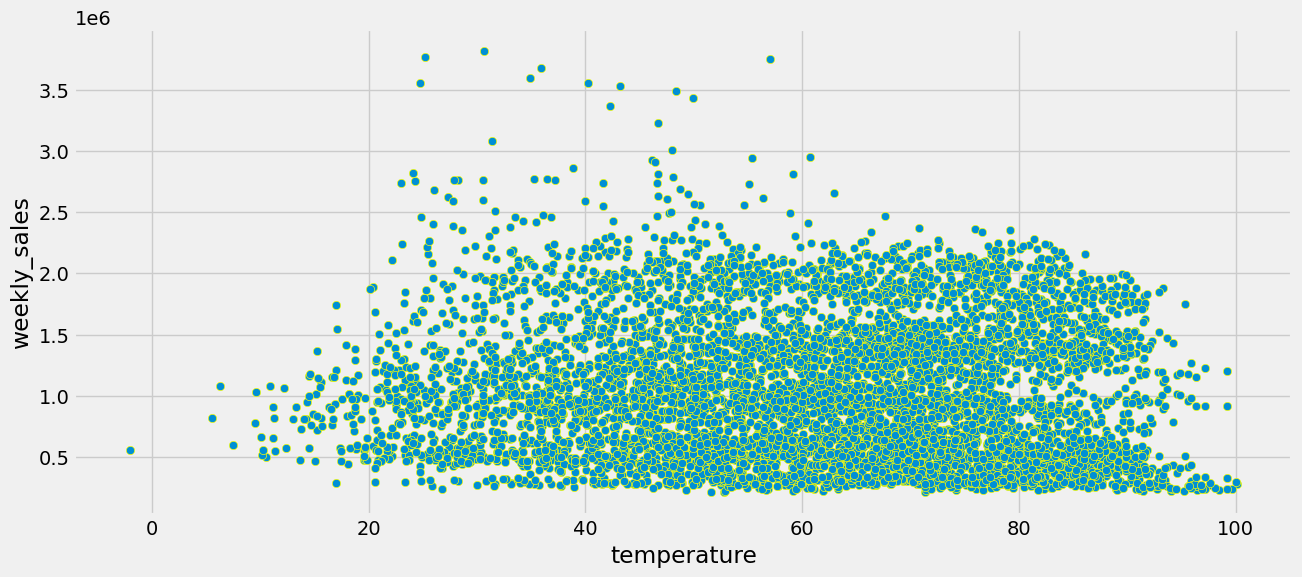

In [109]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'temperature',
           y = 'weekly_sales',
           edgecolor = 'yellow')
plt.show()

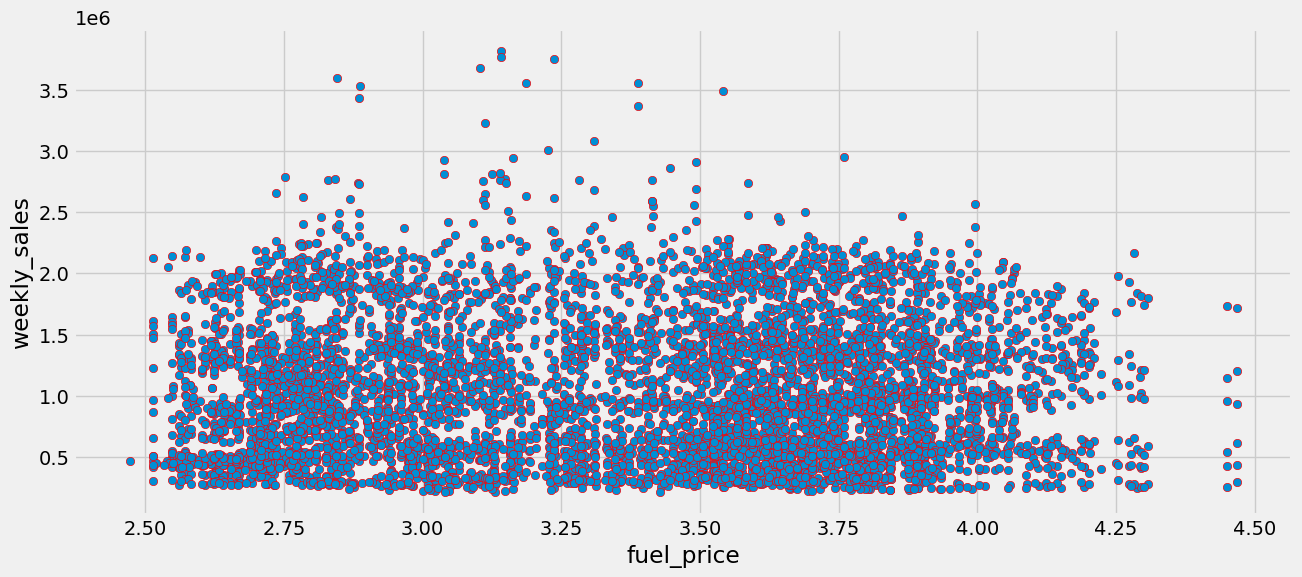

In [110]:
 plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'fuel_price',
           y = 'weekly_sales',
           edgecolor = 'Red')
plt.show()

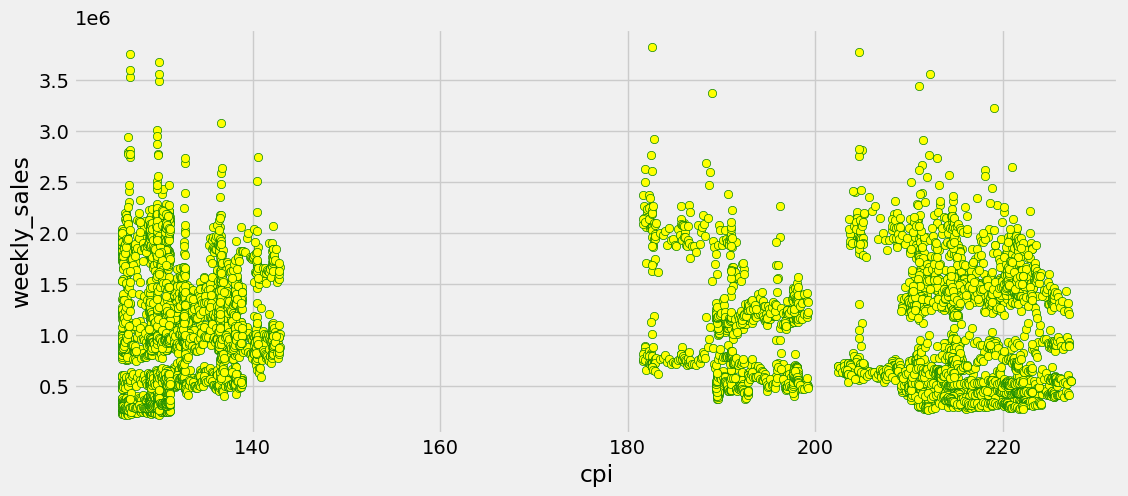

In [111]:
plt.figure(figsize = (12, 5))

sns.scatterplot(data = data,
           x = 'cpi',
           y = 'weekly_sales',
           color = 'yellow',
           edgecolor = 'green')
plt.show()

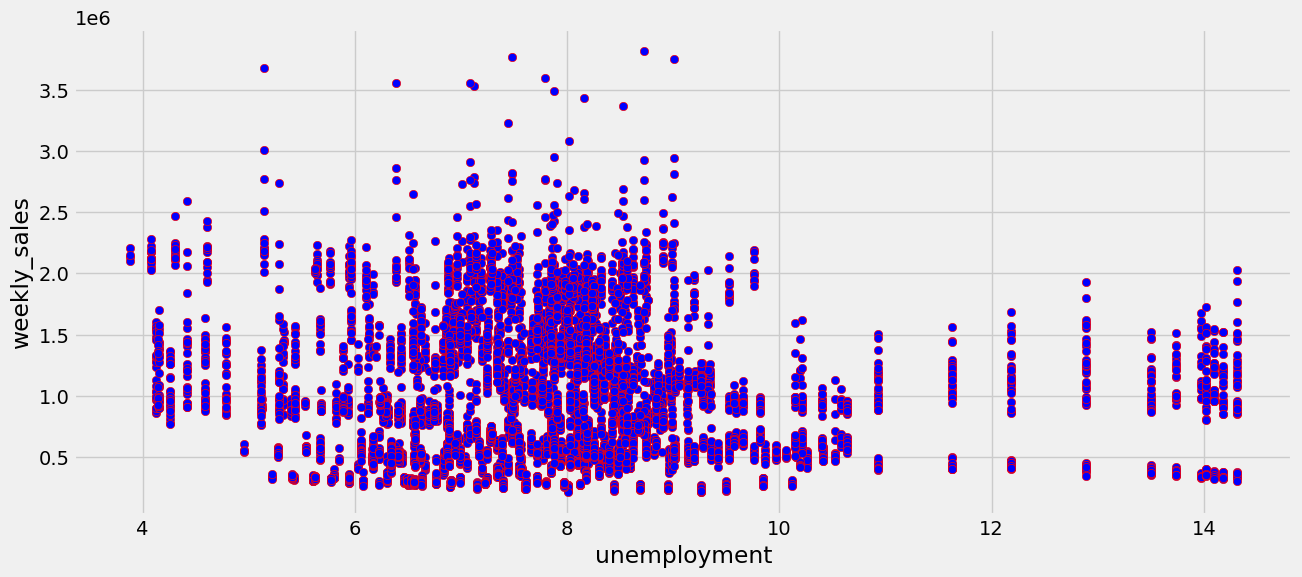

In [112]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'unemployment',
           y = 'weekly_sales',
           color = 'blue',
           edgecolor = 'red')
plt.show()

"this is for univariant "counting Days of week 

In [114]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,5
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,6
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,7
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,9


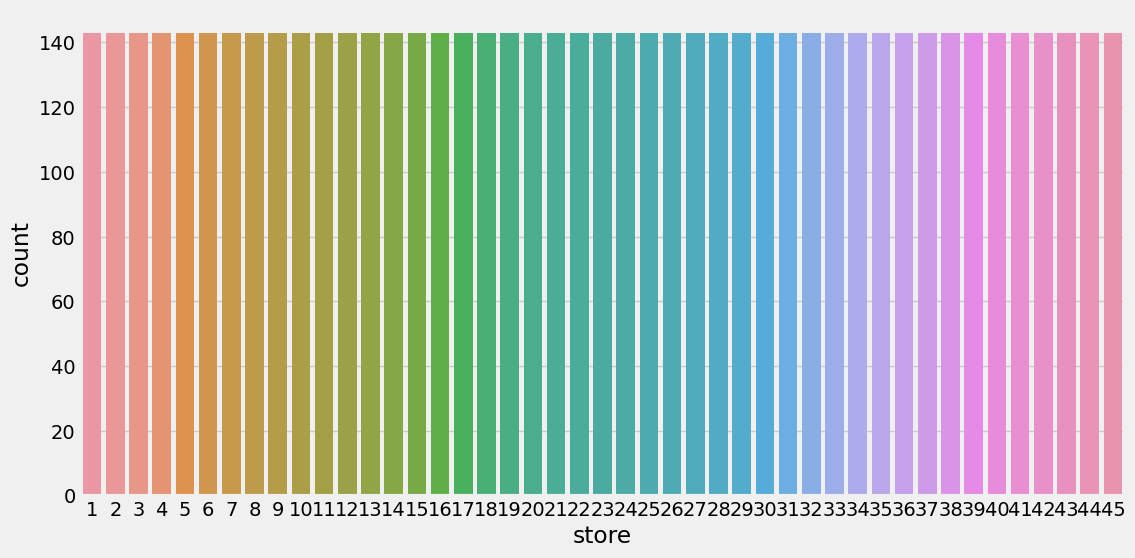

In [147]:
#graphical rep
plt.figure(figsize = (12, 6))
sns.countplot(data = data, x = 'store')
plt.show()

# Time series analysis

In [175]:
weekly_sales = data.groupby('week')['weekly_sales'].sum().sort_values(ascending = False)
weekly_sales

week
51   157,929,657
22   147,242,187
7    147,190,215
27   147,011,815
14   146,755,073
6    145,682,278
23   145,147,453
31   143,706,366
24   143,481,719
26   143,093,116
18   142,489,400
5    141,989,460
33   141,332,753
21   140,943,423
34   140,774,012
36   140,727,685
9    140,713,109
25   140,161,416
32   140,117,439
40   139,881,302
35   139,730,520
13   139,155,684
16   138,483,674
10   138,033,170
28   137,859,562
19   137,702,104
15   136,786,257
11   136,762,806
29   136,222,804
20   135,990,645
43   135,002,768
42   134,008,034
8    133,865,938
41   133,652,808
47   132,414,608
30   132,410,793
12   132,003,955
37   131,100,725
17   130,951,958
38   128,431,158
39   128,170,606
50   121,906,496
49   111,227,918
48    99,299,584
45    94,599,026
44    94,437,526
46    91,564,565
1     87,731,210
52    86,474,980
3     82,735,645
2     82,696,757
4     79,434,828
Name: weekly_sales, dtype: float64

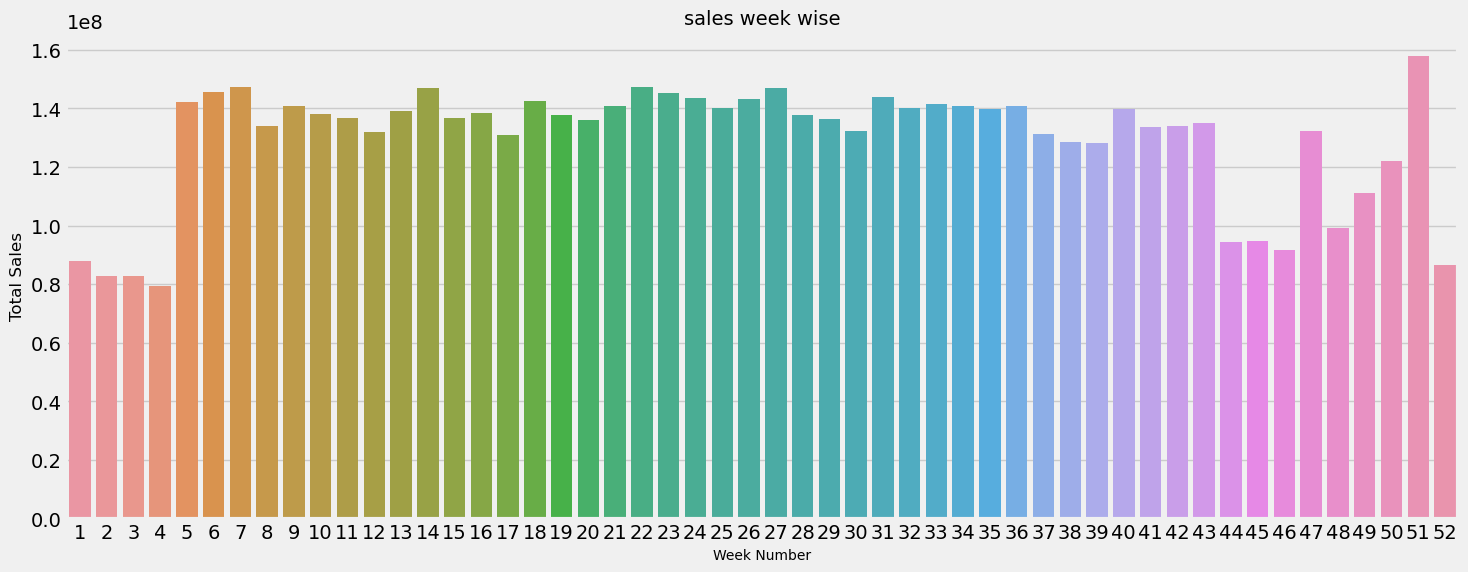

In [117]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'week',
           y = 'weekly_sales',
           #order = weekly_sales.index,
           estimator = np.sum,
           ci = False)

plt.title('sales week wise', size = 14)
plt.xlabel('Week Number', size = 10)
plt.ylabel('Total Sales', size = 12)
plt.show()

In [118]:
pd.pivot_table(data = data,
              index = 'year',
              columns = 'season',
              values = 'weekly_sales',
              aggfunc = 'sum')

season,Fall,Spring,Summer,Winter
year,,,,
2010,"708,775,727","610,369,475","597,488,133","372,252,786"
2011,"681,501,740","597,948,054","639,358,470","529,391,743"
2012,"184,361,680","618,297,715","605,005,763","592,467,702"


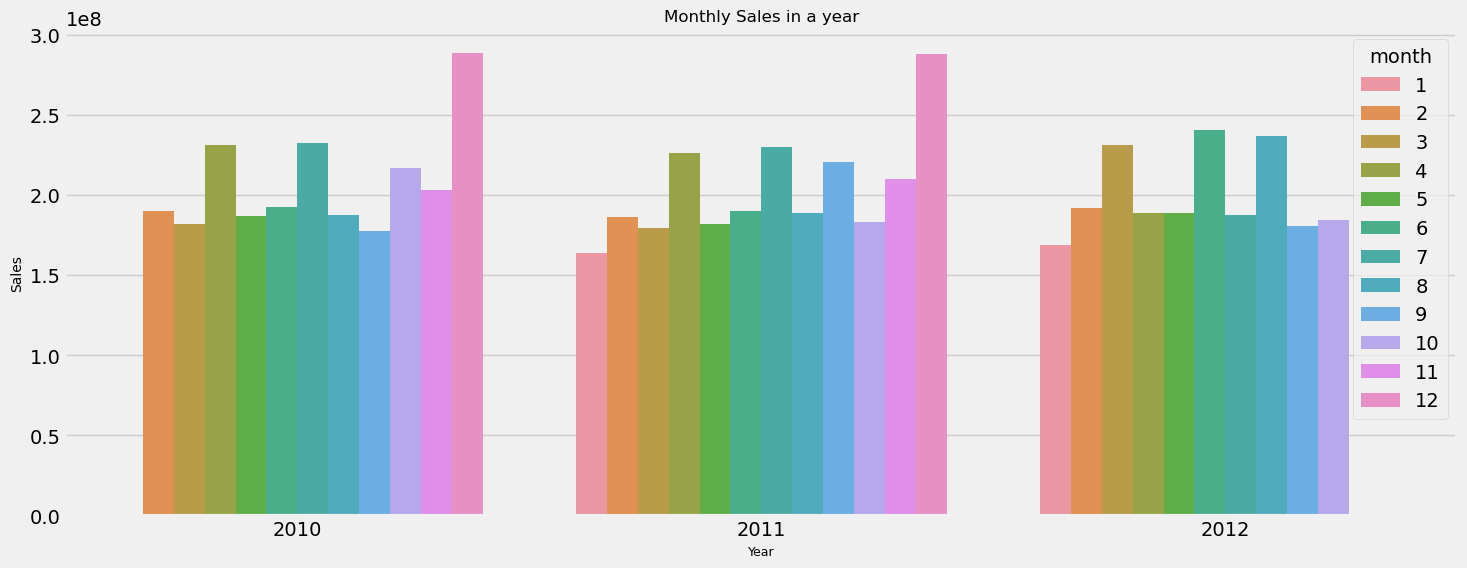

In [119]:
#Month Wise total sales

plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'year',
           y = 'weekly_sales',
           hue = 'month',
           estimator = np.sum,
           ci = False)

plt.title('Monthly Sales in a year', size = 12)
plt.xlabel('Year', size = 9)
plt.ylabel('Sales', size = 10)
plt.show()

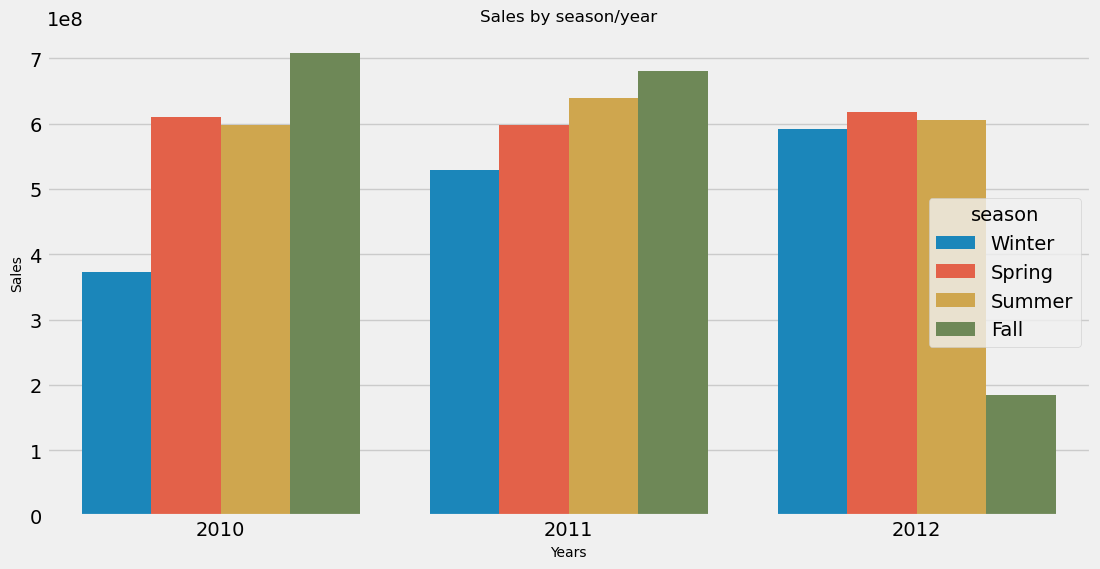

In [120]:
#season wise total sales 

plt.figure(figsize = (12, 6))
sns.barplot(data = data,
           x = 'year',
           y = 'weekly_sales',
           hue = 'season',
           estimator = np.sum,
           ci = False)

plt.title('Sales by season/year', size = 12)
plt.xlabel('Years', size = 10)
plt.ylabel('Sales', size = 10)
plt.show()

In [176]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,week,week_days,month_name
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,5,Friday,February
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,6,Friday,February
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,7,Friday,February
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,8,Friday,February
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,9,Friday,March


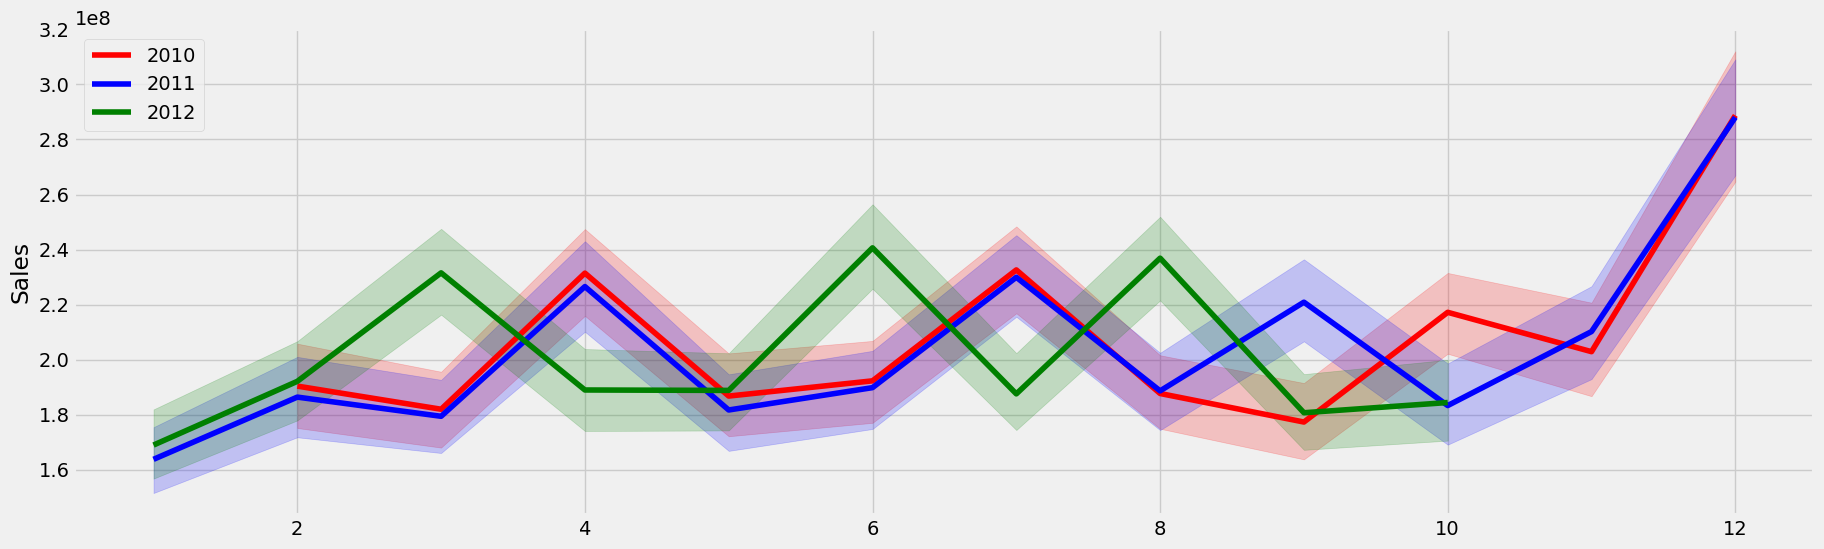

In [128]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 6))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year']==int(year)], 
                x = 'month',
                y = 'weekly_sales',
                estimator = np.sum,
                color = colors[i],
                label = year)
plt.title('')
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

# Taking the mean of all years sale in line Plot

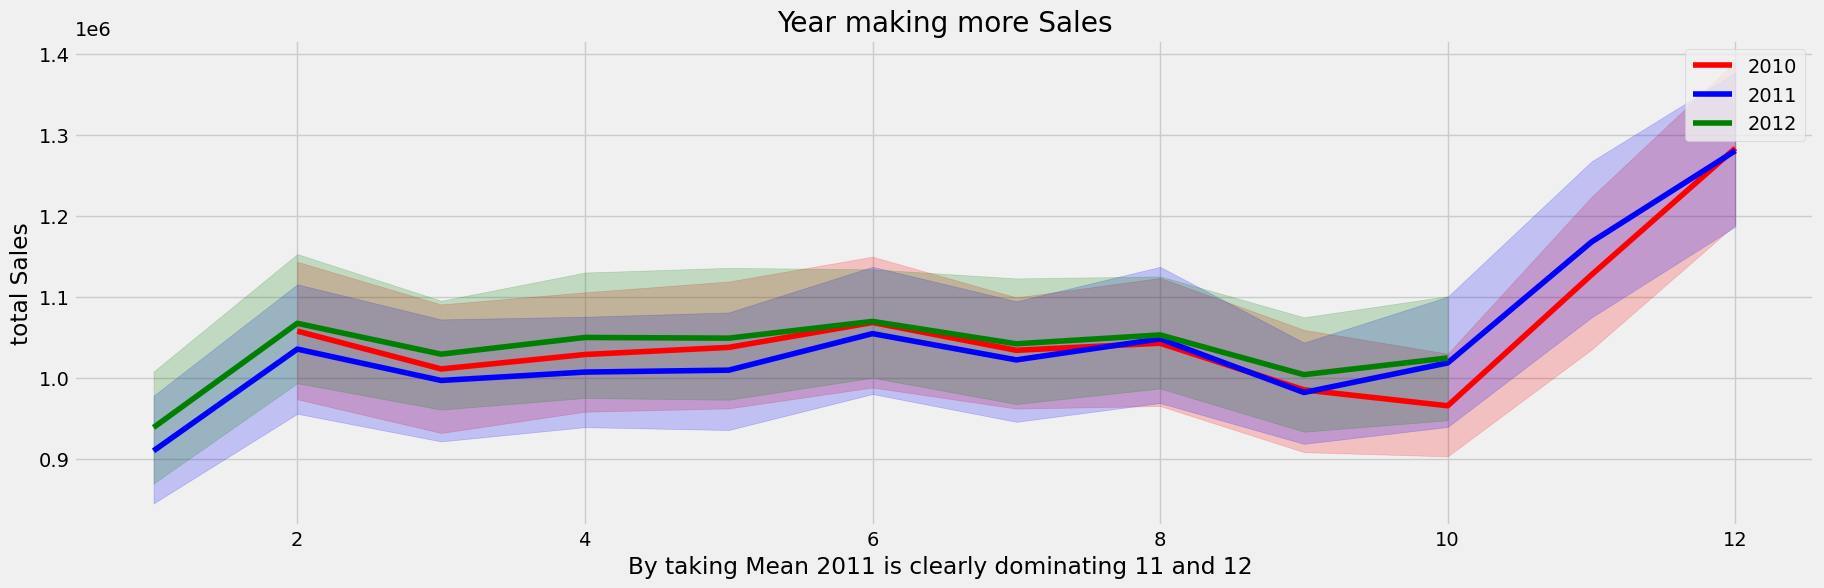

In [126]:


years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 6))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year']==int(year)], 
                x = 'month',
                y = 'weekly_sales',
                estimator = np.mean,
                color = colors[i],
                label = year)
plt.title('Year making more Sales')
plt.xlabel('By taking Mean 2011 is clearly dominating 11 and 12 ')
plt.ylabel('total Sales')
plt.show()

# Data Preporcessing
checking the correlation : Pearson correlation


To measure the extent of interdependance of variables 

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1

Rule
if p <0.001: The correlatin is significant
    p< 0.05: correlation is significant(moderate level)
    p < 0.1: Week  correlation
    p > 0.1: No correlation .....



In [39]:
pearson_coef, p_value = stats.pearsonr(data['fuel_price'], data['weekly_sales'])
print(f'Pearson Coefficient: {pearson_coef} \n p-value {p_value}')

Pearson Coefficient: 0.009463786314475142 
 p-value 0.44782874894858093


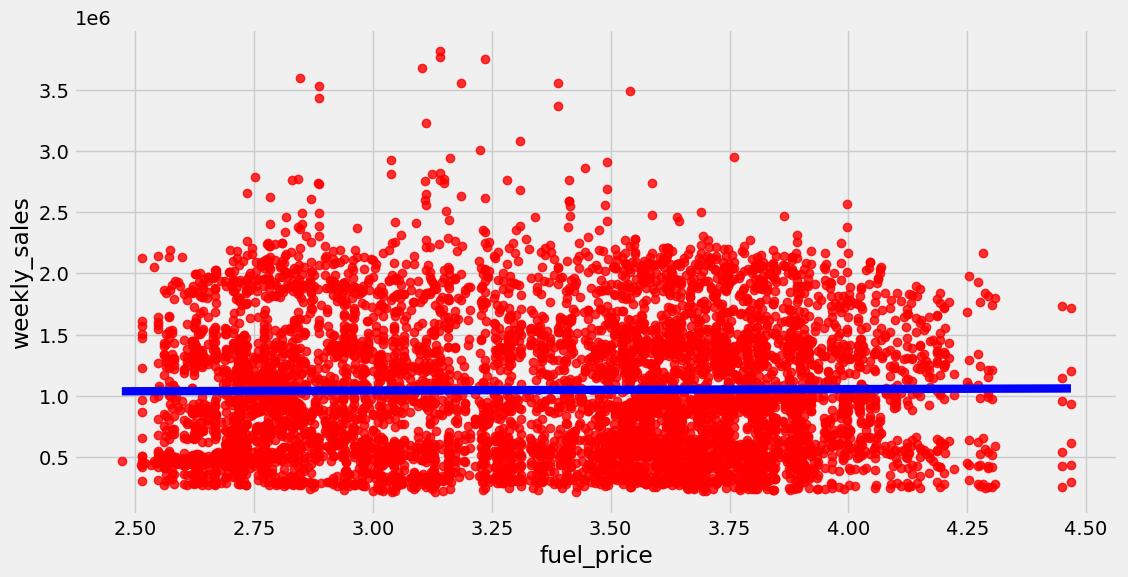

In [40]:
plt.figure(figsize = (12, 6))
sns.regplot(data = data, x = 'fuel_price', y = 'weekly_sales', color = 'red',line_kws = {'color':'blue'})
plt.show()

In [179]:
pearson_coef, p_value = stats.pearsonr(data['temperature'], data['weekly_sales'])
print(f'Pearson Coefficient is: {pearson_coef}\n p-value {p_value}')

Pearson Coefficient is: -0.06381001317946955
 p-value 3.007647625833226e-07


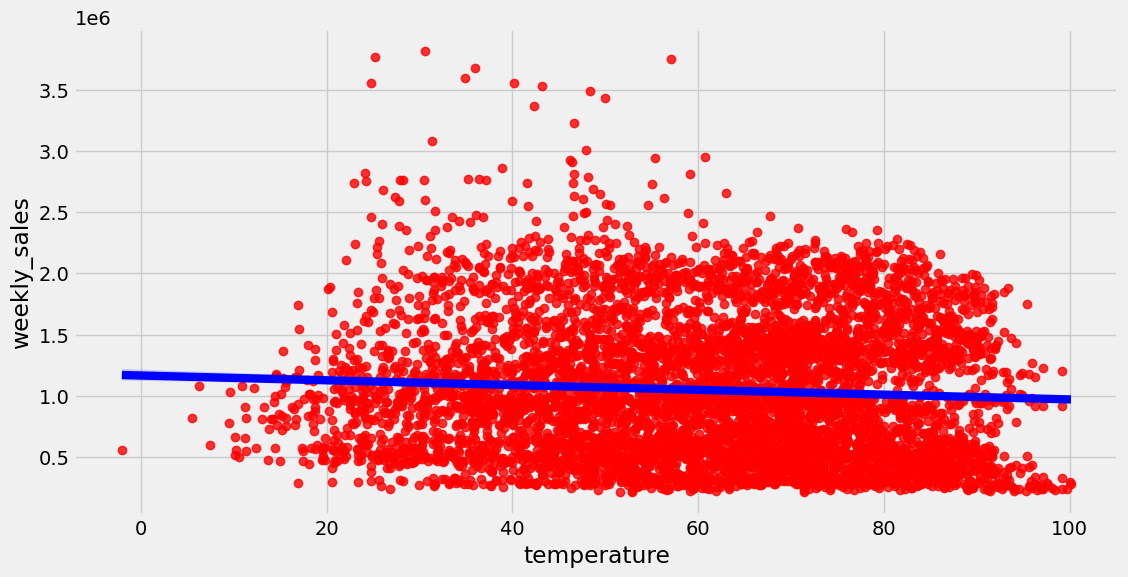

In [181]:
plt.figure(figsize = (12, 6))
sns.regplot(data = data, x = 'temperature', y = 'weekly_sales', color = 'red',line_kws = {'color':'blue'})
plt.show()

In [41]:
pearson_coef, p_value = stats.pearsonr(data['unemployment'], data['weekly_sales'])
print(f'Pearson Coefficient is: {pearson_coef} \n p-value {p_value}')

Pearson Coefficient is: -0.10617608965795426 
 p-value 1.3448365210234661e-17


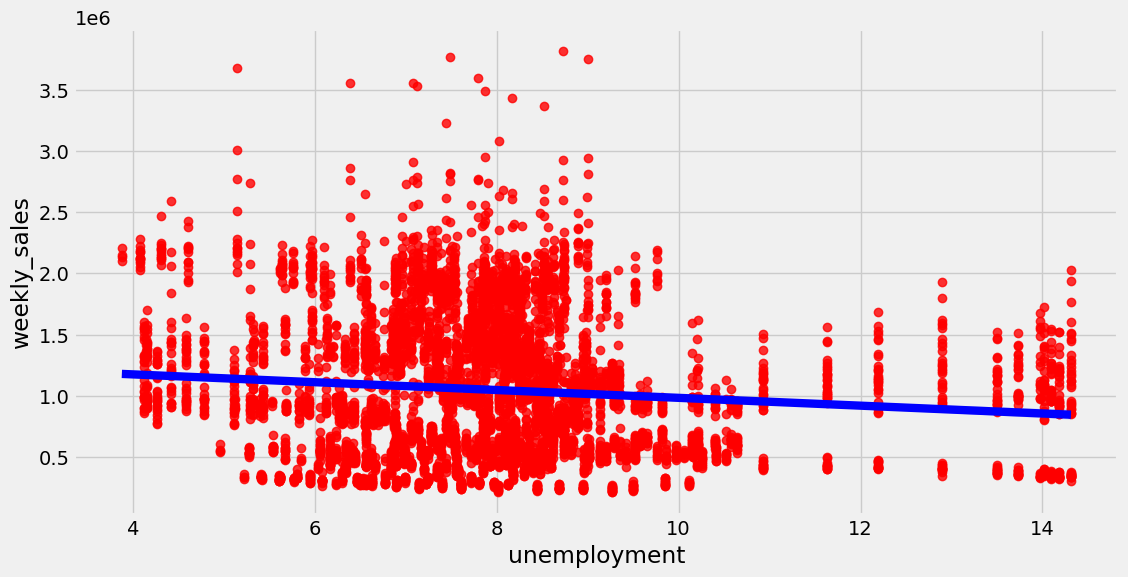

In [184]:
plt.figure(figsize = (12, 6))
sns.regplot(data = data, x = 'unemployment', y = 'weekly_sales', color = 'red',line_kws = {'color':'blue'})
plt.show()

In [186]:
pearson_coef, p_value = stats.pearsonr(data['cpi'], data['weekly_sales'])
print(f'Pearson Coefficient is: {pearson_coef} \n p-value {p_value}')

Pearson Coefficient is: -0.07263416204017624 
 p-value 5.438292612176735e-09


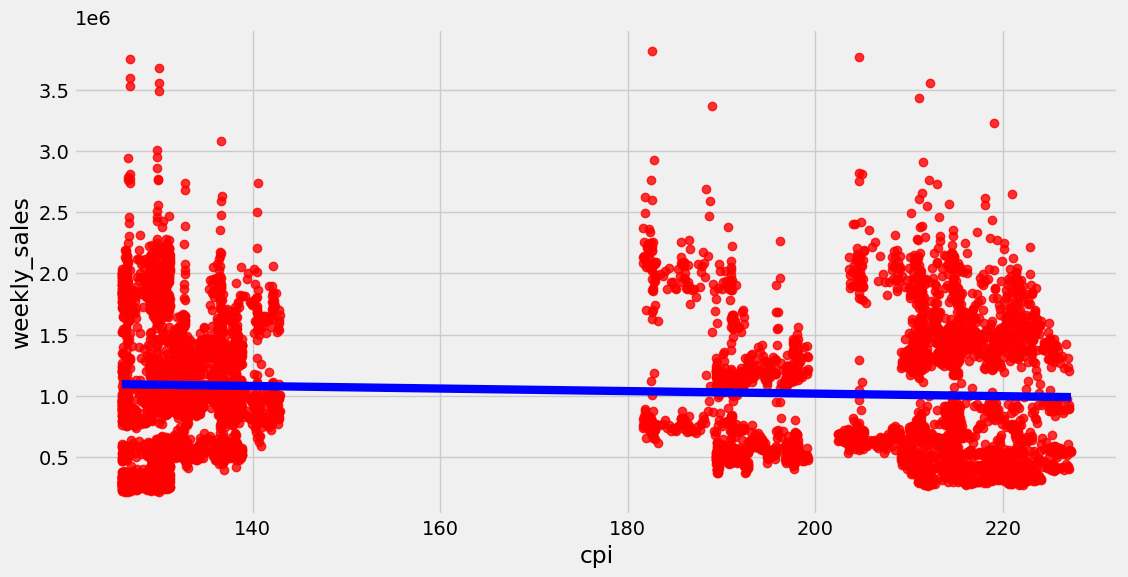

In [187]:
plt.figure(figsize = (12, 6))
sns.regplot(data = data, x = 'cpi', y = 'weekly_sales', color = 'red',line_kws = {'color':'blue'})
plt.show()

In [42]:
#Overall correlations 

corr = data[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr()['weekly_sales'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,weekly_sales
weekly_sales,1.000000
fuel_price,0.009464
temperature,-0.063810
cpi,-0.072634
unemployment,-0.106176


The data is cleaned, copy and creating new csv for subet

In [129]:
data.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,5
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,6
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,7
3,1,2010-02-26,"1,409,728",0,47,3,211,8,2010,1,Winter,2,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8,2010,1,Winter,3,9


In [186]:

data.to_csv('cleaned_walmart.csv', index = False)

In [187]:
copy= data.copy()

In [188]:
copy.drop(['date', 'year', 'quarter', 'month', 'week_days', 'fuel_price'], axis = 1, inplace = True)

In [189]:
copy

,store,weekly_sales,holiday_flag,temperature,cpi,unemployment,season,week,month_name
0,1,"1,643,691",0,42,211,8,Winter,5,February
1,1,"1,641,957",1,39,211,8,Winter,6,February
2,1,"1,611,968",0,40,211,8,Winter,7,February
3,1,"1,409,728",0,47,211,8,Winter,8,February
4,1,"1,554,807",0,46,211,8,Winter,9,March
...,...,...,...,...,...,...,...,...,...
6430,45,"713,174",0,65,192,9,Summer,39,September
6431,45,"733,455",0,65,192,9,Fall,40,October
6432,45,"734,464",0,54,192,9,Fall,41,October
6433,45,"718,126",0,56,192,9,Fall,42,October


In [190]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   int64  
 3   temperature   6435 non-null   float64
 4   cpi           6435 non-null   float64
 5   unemployment  6435 non-null   float64
 6   season        6435 non-null   object 
 7   week          6435 non-null   UInt32 
 8   month_name    6435 non-null   object 
dtypes: UInt32(1), float64(4), int64(2), object(2)
memory usage: 433.7+ KB


In [191]:
#Changing the datatype
copy['week'] = copy['week'].astype('int32')
copy['store'] = copy['store'].astype('object')
copy['holiday_flag'] = copy['holiday_flag'].astype('object')

In [192]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   object 
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   object 
 3   temperature   6435 non-null   float64
 4   cpi           6435 non-null   float64
 5   unemployment  6435 non-null   float64
 6   season        6435 non-null   object 
 7   week          6435 non-null   int32  
 8   month_name    6435 non-null   object 
dtypes: float64(4), int32(1), object(4)
memory usage: 427.5+ KB


In [193]:
copy['week'] = copy['week'].astype('object')

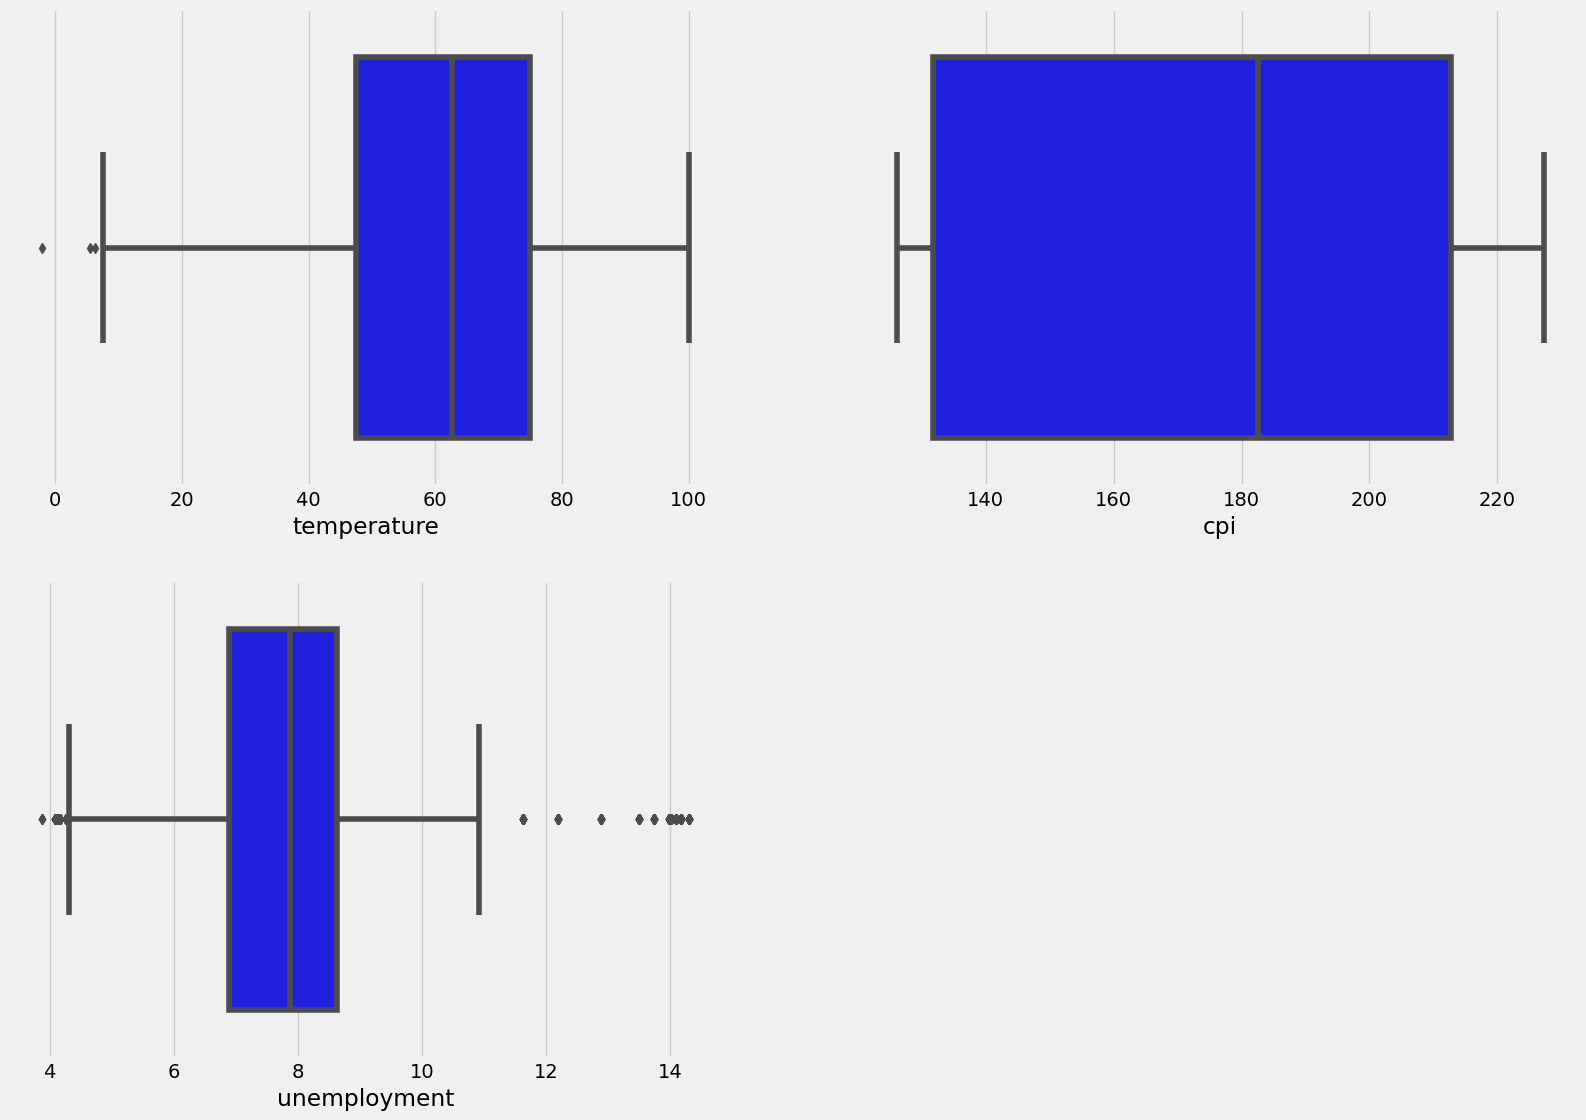

In [194]:
#creating a histogram for num cols using the Sqr root rule
#checking and removing outliers

cols = ['temperature', 'cpi', 'unemployment']

plt.figure(figsize = (18, 20))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = data, x = col,color = 'blue')
plt.show()

In [195]:
#Removing the outliers
copy.drop(copy[copy['temperature']<7].index, axis = 0, inplace = True)

In [196]:
copy.drop(copy[copy['unemployment']<4.2].index, axis = 0, inplace = True)
copy.drop(copy[copy['unemployment']>11].index, axis = 0, inplace = True)

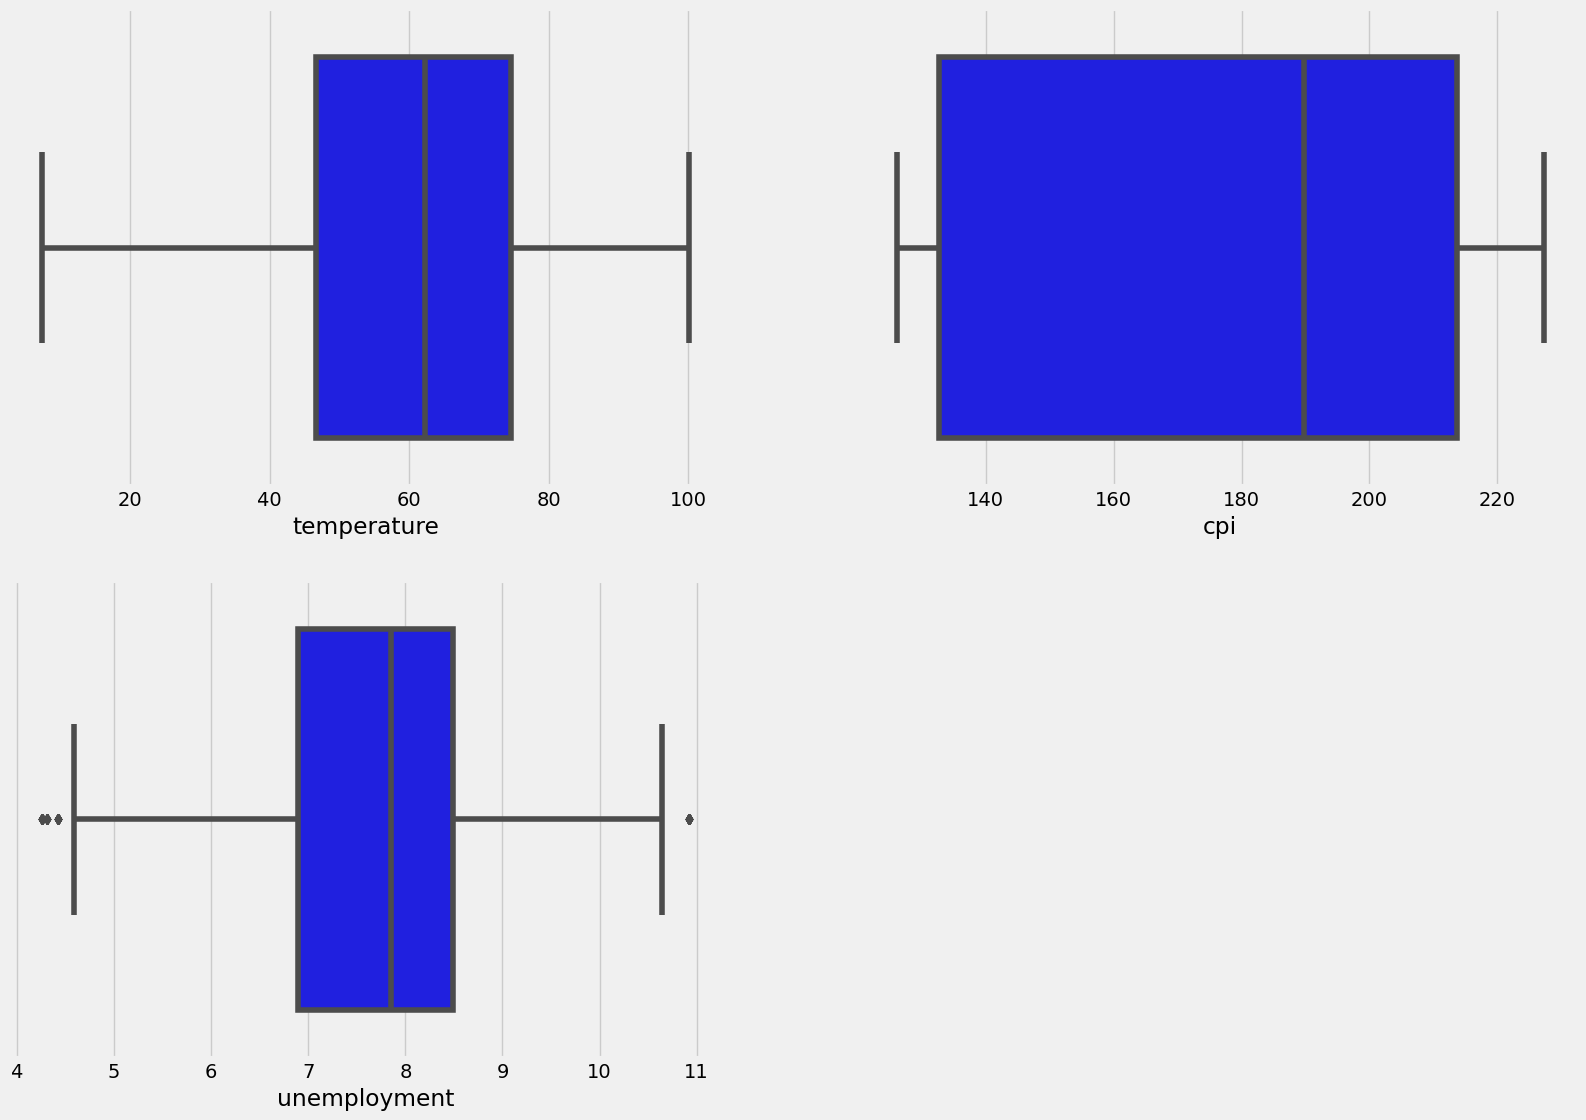

In [197]:
cols = ['temperature', 'cpi', 'unemployment']

plt.figure(figsize = (18, 20))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = copy, x = col,color = 'blue')
plt.show()

In [198]:
copy.drop(copy[copy['unemployment']<4.5].index, axis = 0, inplace = True)
copy.drop(copy[copy['unemployment']>10.8].index, axis = 0, inplace = True)

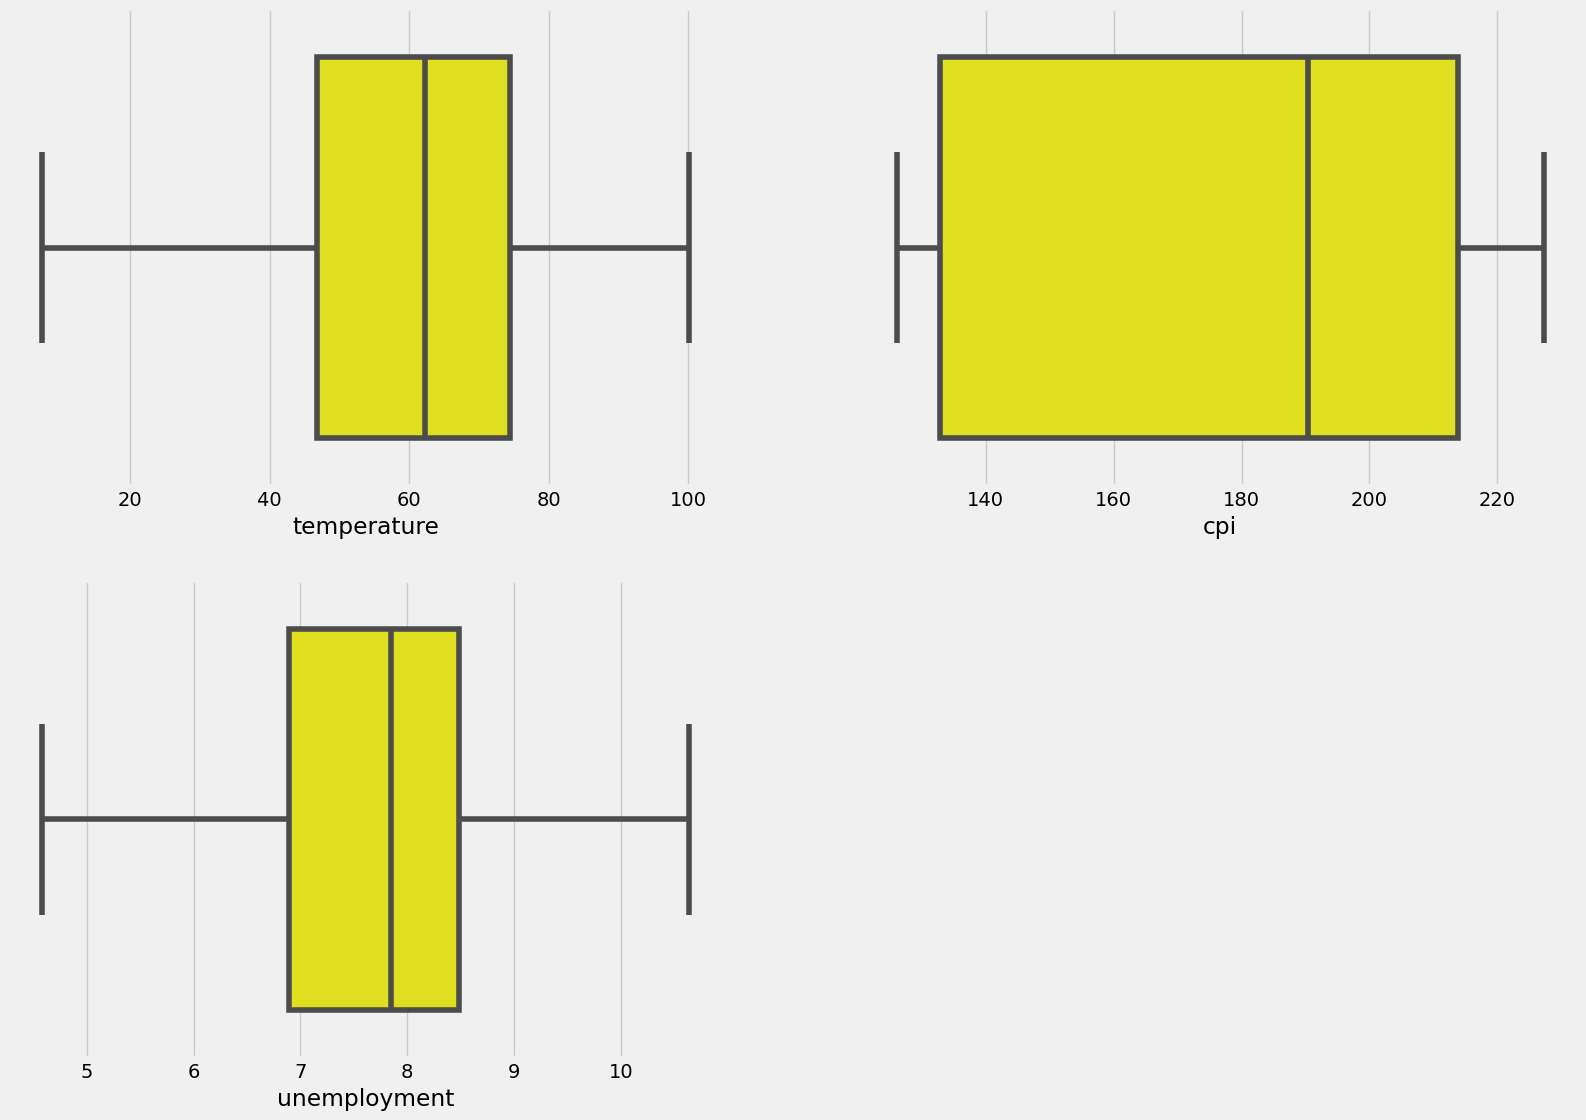

In [199]:
cols = ['temperature', 'cpi', 'unemployment']

plt.figure(figsize = (18, 20))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = copy, x = col,color = 'yellow')
plt.show()

In [200]:
copy.shape

(5873, 9)

# Data modeling step

In [201]:
X = copy.drop('weekly_sales', axis = 1)
y = copy['weekly_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [202]:
X

,store,holiday_flag,temperature,cpi,unemployment,season,week,month_name
0,1,0,42,211,8,Winter,5,February
1,1,1,39,211,8,Winter,6,February
2,1,0,40,211,8,Winter,7,February
3,1,0,47,211,8,Winter,8,February
4,1,0,46,211,8,Winter,9,March
...,...,...,...,...,...,...,...,...
6430,45,0,65,192,9,Summer,39,September
6431,45,0,65,192,9,Fall,40,October
6432,45,0,54,192,9,Fall,41,October
6433,45,0,56,192,9,Fall,42,October


In [316]:
y

0      1,643,691
1      1,641,957
2      1,611,968
3      1,409,728
4      1,554,807
          ...   
6430     713,174
6431     733,455
6432     734,464
6433     718,126
6434     760,281
Name: weekly_sales, Length: 5873, dtype: float64

In [204]:
num = copy.select_dtypes('number').columns.to_list()
num.remove('weekly_sales')

cat_features = copy.select_dtypes('object').columns.to_list()

In [205]:
num

['temperature', 'cpi', 'unemployment']

In [206]:
cat_features

['store', 'holiday_flag', 'season', 'week', 'month_name']

In [209]:
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('catagory_features', BinaryEncoder(), cat_features),
])
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['temperature', 'cpi', 'unemployment']),
                                ('catagory_features', BinaryEncoder(),
                                 ['store', 'holiday_flag', 'season', 'week',
                                  'month_name'])])

In [210]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [211]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_evaluation(estimator, Trainig_Testing, X, y):
    data_predict = estimator.predict(X)
    
    print(f'{Trainig_Testing} Accuracy: \n')
    print(f'-> RMSE : {round(np.sqrt(mean_squared_error(y,data_predict)), 2)}')
    print(f'-> R-Squared : {round(r2_score(y,data_predict)*100, 2)}% \n')

In [212]:
def distribution_plot(estimator, Training_Testing, X, y, Title):
    yhat = estimator.predict(X)
    
    plt.figure(figsize = (14, 6))
    ax1 = sns.distplot(y, hist = False, color = 'b', label = f'Actual Values({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = 'r', label = f'Predicted Values({Training_Testing})', ax = ax1)
    plt.title(Title)
    plt.legend()
    plt.show()

In [213]:
def distribution_plot(estimator, Training_Testing, X, y, Title):
    yhat = estimator.predict(X)
    
    plt.figure(figsize = (14, 6))
    ax1 = sns.distplot(y, hist = False, color = 'b', label = f'Actual Values({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = 'r', label = f'Predicted Values({Training_Testing})', ax = ax1)
    plt.title(Title)
    plt.legend()
    plt.show()

In [214]:
def cross_validation_score(estimator, X_train, y_train, score = 'r2', n = 5):
    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = n)

    print(f'Cross validation scores: {validate}\n')
    print(f'Mean of scores: {round(validate.mean()*100, 2)}% \n')
    print(f'Standard Deviation: {validate.std()}')

In [215]:
def hyperparameter_tuning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):
    
    # grid search
    grid_search = GridSearchCV(estimator = estimator,
                              param_grid = param_grid,
                              scoring = score,
                              cv = n)
    # fiting the data
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters: {best_params}\n')
    print(f'Best Score: {best_score}\n')
    best_estimator = grid_search.best_estimator_
    
    return best_estimator
    

In [216]:
#LR = LinearRegression()
#LR.fit(X_train_transformed, y_train)


tree = DecisionTreeRegressor()

# Fitting the training data
tree.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [217]:
model_evaluation(tree, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> RMSE : 0.0
-> R-Squared : 100.0% 



In [218]:
from sklearn.ensemble import RandomForestRegressor
model_rf =  RandomForestRegressor()
model_rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [219]:
model_evaluation(model_rf, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> RMSE : 47166.59
-> R-Squared : 99.32% 



In [220]:

LR = LinearRegression()
LR.fit(X_train_transformed, y_train)

LinearRegression()

In [221]:
model_evaluation(LR, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> RMSE : 519913.38
-> R-Squared : 17.77% 

